# Chapter 10. Introduction to Artificial Neural Networks with Keras

## From Biological to Artificial Neurons

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int64) # Iris setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",1.0
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",0


In [4]:
y_pred = per_clf.predict([[2, 0.5]])

In [5]:
X.shape

(150, 2)

## Implementing MLPs with Keras

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

d:\sahoreia\Python\Machine Learning exploring\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
tf.__version__

'2.20.0'

In [8]:
keras.__version__

'3.13.0'

### Building an Image Classifier Using the Sequential API

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(55000, 28, 28) (5000, 28, 28) (55000,) (5000,)


In [13]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [14]:
class_names[y_train[0]]

'Coat'

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

d:\sahoreia\Python\Machine Learning exploring\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
model.get_layer("dense") is hidden1

True

In [20]:
hidden1

<Dense name=dense, built=True>

In [21]:
weights, biases = hidden1.get_weights()
print(weights)

[[ 0.01350555 -0.06299257 -0.0547401  ... -0.06638184 -0.01563469
  -0.00924229]
 [ 0.00392074 -0.03400343 -0.06348962 ... -0.01535672 -0.05944201
   0.03554715]
 [ 0.06581342  0.04669843 -0.05043194 ... -0.03402714 -0.06773767
   0.02359686]
 ...
 [-0.04175533  0.04406586 -0.02339827 ...  0.01696766  0.06857979
  -0.06642434]
 [ 0.0056651  -0.0650823   0.0660747  ... -0.00120453  0.02820151
   0.02396558]
 [ 0.00811883  0.00618301  0.04117864 ... -0.0272722  -0.01441509
  -0.06621044]]


In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

### Compiling the model

In [25]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7563 - loss: 0.7457 - val_accuracy: 0.8294 - val_loss: 0.5224
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8277 - loss: 0.4950 - val_accuracy: 0.8562 - val_loss: 0.4412
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8418 - loss: 0.4481 - val_accuracy: 0.8602 - val_loss: 0.4108
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8533 - loss: 0.4187 - val_accuracy: 0.8540 - val_loss: 0.4093
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8598 - loss: 0.3995 - val_accuracy: 0.8670 - val_loss: 0.3887
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8663 - loss: 0.3809 - val_accuracy: 0.8674 - val_loss: 0.3833
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8710 - loss: 0.3682 - val_accuracy: 0.8720 - val_loss: 0.3626
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.3572

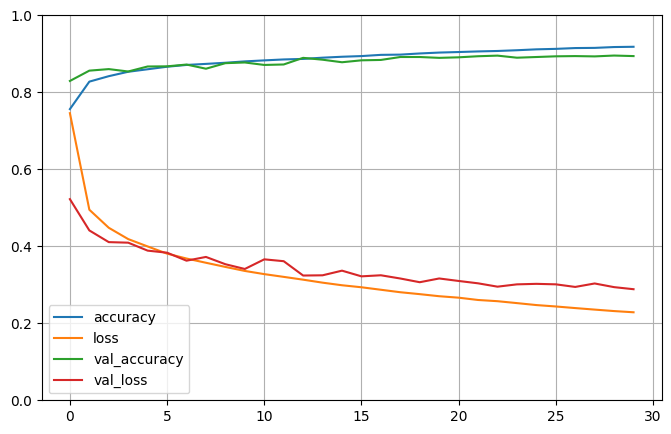

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [28]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.756273,0.745747,0.8294,0.522430
1,0.827655,0.494976,0.8562,0.441170
2,0.841818,0.448062,0.8602,0.410789
3,0.853291,0.418652,0.8540,0.409349
4,0.859782,0.399538,0.8670,0.388684
5,0.866345,0.380883,0.8674,0.383343
6,0.871000,0.368187,0.8720,0.362582
7,0.873727,0.357177,0.8612,0.372313
8,0.876691,0.346376,0.8756,0.353387
9,0.880236,0.335955,0.8774,0.341054


In [ ]:
model.evaluate(X_test, y_test) # [loss, accuracy]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 59.9236


[59.92361068725586, 0.8499000072479248]

### Using the model to make predictions

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
y_proba = model.predict(X_new) # class probabilities
y_pred = np.argmax(y_proba, axis=1) # final predicted class 
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([9, 2, 1])

### Building a Regression MLP Using the Sequential API

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [42]:
X_train.shape

(11610, 8)

In [43]:
X_test.shape

(5160, 8)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", 
    input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

d:\sahoreia\Python\Machine Learning exploring\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [54]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9480 - val_loss: 0.6107
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5408 - val_loss: 0.5329
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5537 - val_loss: 0.5713
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4979 - val_loss: 0.4977
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4729 - val_loss: 0.4861
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4628 - val_loss: 0.4887
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4574 - val_loss: 0.4750
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4591 - val_loss: 0.4595
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4458 - val_loss: 0.4569
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4309 - val_loss: 0.4450
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4250 - val_loss: 0.4406
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [55]:
mse_test = model.evaluate(X_test, y_test)
print(f"Test set mean squared error: {mse_test}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3817
Test set mean squared error: 0.3816970884799957


In [56]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[1.217123  ]
 [0.99624133]
 [2.0901299 ]]


In [57]:
y_pred.round(2)

array([[1.22],
       [1.  ],
       [2.09]], dtype=float32)